In [7]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline

## Importing the data and data cleasing

### Train set

In [8]:
train = pd.read_csv("../data/train/blogData_train.csv", header=None)

#### Brief look at the data

In [9]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


#### Check for NA values in the train data

In [10]:
print("Number of missing values is",train.isna().sum().sum())

Number of missing values is 0


The train data set does not require data cleaning.

### Test set

Since the testset is divided into 60 files, I will first combine and output the testset into the data folder.

In [11]:
path =r'../data/test/raw' 
allFiles = glob.glob(path + "/*.csv")
test = pd.DataFrame()
for file_ in allFiles:
    test = test.append(pd.read_csv(file_, header=None))

In [12]:
test.to_csv("../data/test/test.csv")

## EDA

#### Size of the data

In [13]:
n,d = train.shape
print("Number of features:", d)
print("Number of samples:", n)

Number of features: 281
Number of samples: 52397


#### Summary statistics of the data

In [14]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,...,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.0,52397.000000,52397.000000,52397.000000
mean,39.444167,46.806717,0.358914,339.853102,24.681661,15.214611,27.959159,0.002748,258.666030,5.829151,...,0.171327,0.162242,0.154455,0.096151,0.088917,0.119167,0.0,1.242094,0.769505,6.764719
std,79.121821,62.359996,6.840717,441.430109,69.598976,32.251189,38.584013,0.131903,321.348052,23.768317,...,0.376798,0.368676,0.361388,0.294800,0.284627,1.438194,0.0,27.497979,20.338052,37.706565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.285714,5.214318,0.000000,29.000000,0.000000,0.891566,3.075076,0.000000,22.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,10.630660,19.353120,0.000000,162.000000,4.000000,4.150685,11.051215,0.000000,121.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.304670,77.442830,0.000000,478.000000,15.000000,15.998589,45.701206,0.000000,387.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1122.666600,559.432600,726.000000,2044.000000,1314.000000,442.666660,359.530060,14.000000,1424.000000,588.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,136.000000,0.0,1778.000000,1778.000000,1424.000000


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
z = pca.fit_transform(train)

Text(0.5,1,'PCA')

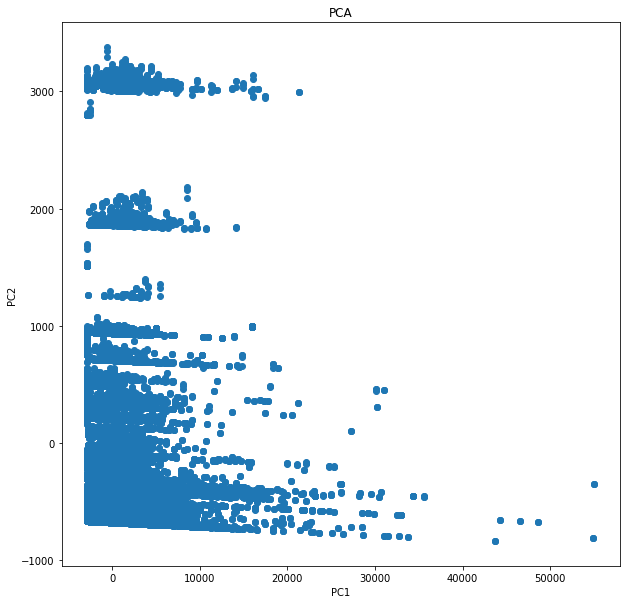

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(z[:,0], z[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")

## Feature selection

In [17]:
Xtrain = train.iloc[:,0:280]
ytrain = train.iloc[:,-1]

In [18]:
a_list = 10**np.linspace(-1,5, 7)
ratio = np.linspace(0,1, 20)
mean_squared_err = lambda y, yhat: np.mean((y-yhat)**2)

### Ridge

In [19]:
ridge = RidgeCV(alphas=a_list)
ridge.fit(Xtrain, ytrain)

RidgeCV(alphas=array([  1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [33]:
print("The best alpha value is", ridge.alpha_)
print("Features selected", ridge.coef_.nonzero()[0].size)
print("The R^2 is ", ridge.score(Xtrain,ytrain))
print("The MSE of the best model is", mean_squared_err(ytrain, ridge.predict(Xtrain)))

The best alpha value is 100000.0
Features selected 276
The R^2 is  0.359195846655
The MSE of the best model is 911.0683523767831


### Lasso

In [22]:
lasso = LassoCV(alphas=a_list)
lasso.fit(Xtrain, ytrain)

/home/xinbin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xinbin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=array([  1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]),
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [32]:
print("The best alpha value is", lasso.alpha_)
print("Features selected", lasso.coef_.nonzero()[0].size)
print("The R^2 is ", lasso.score(Xtrain,ytrain))
print("The MSE of the best model is", mean_squared_err(ytrain, lasso.predict(Xtrain)))

The best alpha value is 0.1
Features selected 42
The R^2 is  0.359509207266
The MSE of the best model is 910.6228294593378


### Elastic Net

In [25]:
elastic = ElasticNetCV(alphas=a_list)
elastic.fit(Xtrain,ytrain)

/home/xinbin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/xinbin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNetCV(alphas=array([  1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05]),
       copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [31]:
print("The best alpha value is", elastic.alpha_)
print("Features selected", elastic.coef_.nonzero()[0].size)
print("The R^2 is ", elastic.score(Xtrain,ytrain))
print("The MSE of the best model is", mean_squared_err(ytrain, elastic.predict(Xtrain)))

The best alpha value is 0.1
Features selected 76
The R^2 is  0.360031282166
The MSE of the best model is 909.8805653584458


In [44]:
residuals = elastic.predict(Xtrain) - ytrain

### Summary Table

| method | Feature selected | R-squared | MSE|
| ---| --- | --- |---| 
| Ridge |  276 | 0.3591|911.06|
| Lasso | 42 | 0.3595| 910.62|
| Elastic Net| 76| 0.3600 | 909.88|

Given that all three models give similar results in terms of `R-squared` and `MSE`, all models are fairly similar in terms of goodness of fit. However, I would prefer the models with fewer features, which in this case are Lasso and Elatic Net. So, I will use these two models to test on the test set.

## Test on test set

### Lasso

In [36]:
Xtest = test.iloc[:,0:280]
ytest = test.iloc[:,-1]

In [39]:
print("The R^2 is ", lasso.score(Xtest,ytest))
print("The MSE of the best model is", mean_squared_err(ytest, lasso.predict(Xtest)))

The R^2 is  0.314520584116
The MSE of the best model is 637.6626136186926


### Elastic Net

In [40]:
print("The R^2 is ", elastic.score(Xtest,ytest))
print("The MSE of the best model is", mean_squared_err(ytest, elastic.predict(Xtest)))

The R^2 is  0.313782849577
The MSE of the best model is 638.3488862080598


### Summary Table based on test set

| method | Feature selected | R-squared | MSE|
| ---| --- | --- |---| 
| Lasso | 42 | 0.3145| 637.66|
| Elastic Net| 76| 0.3137 | 638.34|

Given the results from the test set, two models are fairly equivalent in terms of fitting. Lasso achieve a slightly lower `R-squared` and `MSE` with less features required. Thus, I would select the relevant features based on the Lasso model.

The corresponding indexes of the featues selected are shown below, which can be referred back in the [data-attribute-description](../data/data-attribute-description.md) file.

In [42]:
print(lasso.coef_.nonzero()[0])

[  0   1   2   3   4   5   6   8  10  11  13  14  15  16  17  18  19  20
  21  22  23  24  43  50  51  52  53  54  56  58  60  61  68 113 142 157
 225 245 262 268 278 279]
